In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

Research on reversion of Kelp

In [2]:
for i, day in enumerate([-2, -1, 0, 1, 2, 3, 4]):
    file_name = f"../round3_new/round-3-island-data-bottle/prices_round_3_day_{day}.csv"
    df_tmp = pd.read_csv(file_name, sep=';')
    df_tmp['day'] = day
    if i > 0:
        df = pd.concat([df, df_tmp])
    else:
        df = df_tmp
df = df.reset_index(drop=True)

In [3]:
df_kelp = df[df["product"] == "SQUID_INK"].reset_index(drop=True).copy()

Calculate the reversion of filtered mid price. The thresholding volume is 15.

In [4]:
def find_min_i_bid(row):
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 15:
            return pd.Series([row[f'bid_price_{i}'], row[f'bid_volume_{i}']])
    return pd.Series([np.nan, np.nan])

def find_min_i_ask(row):
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 15:
            return pd.Series([row[f'ask_price_{i}'], row[f'ask_volume_{i}']])
    return pd.Series([np.nan, np.nan])

df_kelp[['filtered_bid_price', 'filtered_bid_volume']] = df_kelp.apply(find_min_i_bid, axis=1)
df_kelp[['filtered_ask_price', 'filtered_ask_volume']] = df_kelp.apply(find_min_i_ask, axis=1)


In [5]:
df_kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,filtered_bid_price,filtered_bid_volume,filtered_ask_price,filtered_ask_volume
0,-2,0,SQUID_INK,1998.0,26.0,NaN,NaN,NaN,NaN,2002.0,...,NaN,NaN,NaN,NaN,2000.0,0.0,1998.0,26.0,2002.0,26.0
1,-2,100,SQUID_INK,1999.0,5.0,1998.0,26.0,NaN,NaN,2001.0,...,NaN,NaN,NaN,NaN,2000.0,0.0,1998.0,26.0,2001.0,20.0
2,-2,200,SQUID_INK,1997.0,31.0,NaN,NaN,NaN,NaN,2000.0,...,2001.0,30.0,NaN,NaN,1998.5,0.0,1997.0,31.0,2001.0,30.0
3,-2,300,SQUID_INK,1997.0,27.0,NaN,NaN,NaN,NaN,2000.0,...,NaN,NaN,NaN,NaN,1998.5,0.0,1997.0,27.0,2000.0,27.0
4,-2,400,SQUID_INK,1996.0,20.0,NaN,NaN,NaN,NaN,2000.0,...,NaN,NaN,NaN,NaN,1998.0,0.0,1996.0,20.0,2000.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4,999500,SQUID_INK,1905.0,22.0,NaN,NaN,NaN,NaN,1908.0,...,NaN,NaN,NaN,NaN,1906.5,0.0,1905.0,22.0,1908.0,22.0
69996,4,999600,SQUID_INK,1901.0,30.0,NaN,NaN,NaN,NaN,1903.0,...,1904.0,30.0,NaN,NaN,1902.0,0.0,1901.0,30.0,1904.0,30.0
69997,4,999700,SQUID_INK,1899.0,28.0,NaN,NaN,NaN,NaN,1902.0,...,NaN,NaN,NaN,NaN,1900.5,0.0,1899.0,28.0,1902.0,29.0
69998,4,999800,SQUID_INK,1899.0,34.0,NaN,NaN,NaN,NaN,1902.0,...,NaN,NaN,NaN,NaN,1900.5,0.0,1899.0,34.0,1902.0,29.0


In [6]:
df_kelp['filtered_mid'] = (df_kelp["filtered_ask_price"] + df_kelp["filtered_bid_price"]) / 2

In [7]:
df_kelp['filtered_mid'] = df_kelp['filtered_mid'].fillna(df_kelp['mid_price'])

In [8]:
df_kelp['filtered_mid'].isnull().sum()

0

In [9]:
df_kelp[['filtered_bid_volume', 'filtered_ask_volume', 'filtered_bid_price', 'filtered_ask_price']] = df_kelp[['filtered_bid_volume', 'filtered_ask_volume', 'filtered_bid_price', 'filtered_ask_price']] .fillna(0)

In [10]:
df_kelp['rtn'] = df_kelp['filtered_mid'].pct_change()
df_kelp['rtn_lag_1'] = df_kelp['filtered_mid'].pct_change().shift()

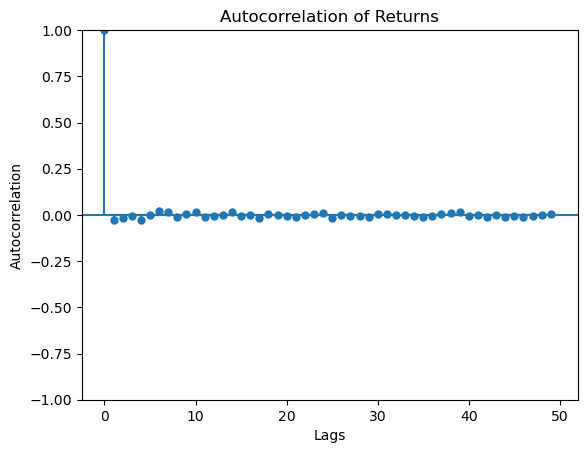

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(df_kelp['rtn'].dropna())
plt.title('Autocorrelation of Returns')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

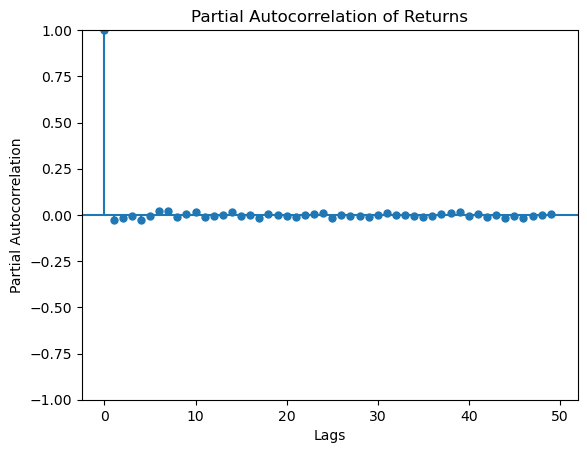

In [12]:
plot_pacf(df_kelp['rtn'].dropna())
plt.title('Partial Autocorrelation of Returns')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [13]:
df_kelp['imb'] = (df_kelp['filtered_bid_volume'] - df_kelp['filtered_ask_volume']) / (df_kelp['filtered_bid_volume'] + df_kelp['filtered_ask_volume'])
df_kelp.loc[(df_kelp['filtered_bid_volume'] == 0) & (df_kelp['filtered_ask_volume'] == 0), 'imb'] = 0

In [14]:
df_kelp['rtn'].corr(df_kelp['rtn_lag_1'])

-0.02783322352733427

In [15]:
df_kelp['rtn'].corr(df_kelp['imb'].shift())

0.011517259405454843

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_kelp[['rtn', 'imb']].shift().values[2:], df_kelp['rtn'].values[2:].reshape(-1, 1))


LinearRegression()

In [17]:
lr.coef_, lr.intercept_

(array([[-0.02773165,  0.00018009]]), array([-1.22516068e-06]))

In [18]:
df_kelp['vol'] = df_kelp['rtn'].pow(2)

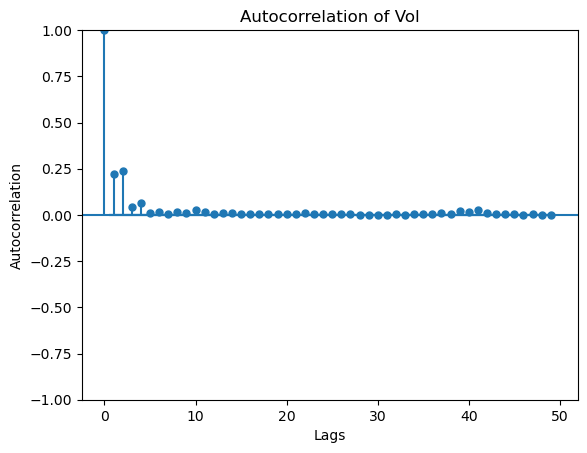

In [19]:
plot_acf(df_kelp['vol'].dropna())
plt.title('Autocorrelation of Vol')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

<Axes: >

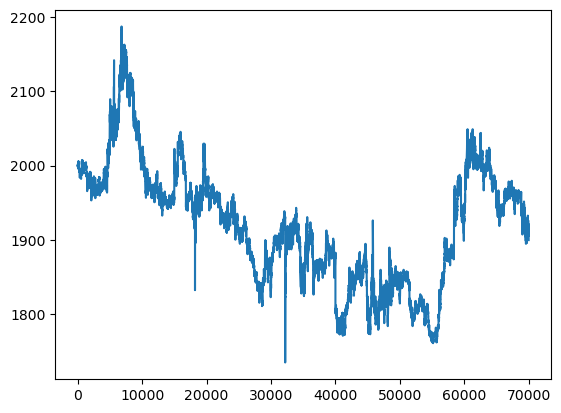

In [20]:
df_kelp['filtered_mid'].plot()

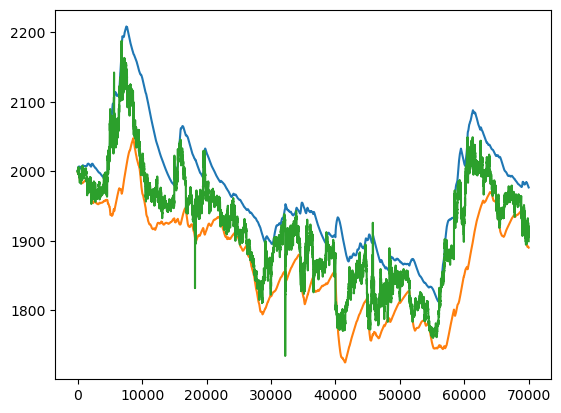

In [25]:
alpha = 0.001
thres = 2
theo = df_kelp['filtered_mid'].ewm(alpha=alpha).mean()
std = df_kelp['filtered_mid'].ewm(alpha=alpha).std()
plt.plot(theo + thres * std, label='Upper Band')
plt.plot(theo - thres * std, label='Lower Band')
plt.plot(df_kelp['filtered_mid'], label='Filtered Mid Price')
plt.show()

<Axes: >

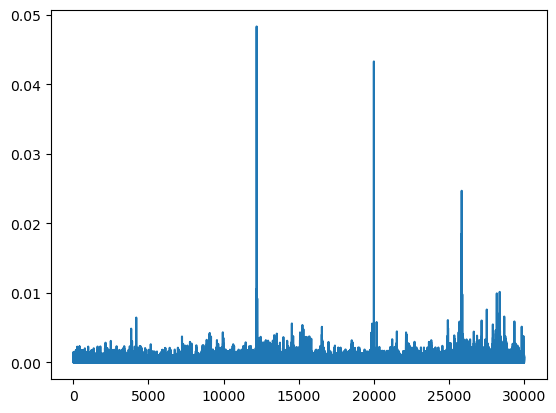

In [70]:
df_kelp['filtered_mid'].pct_change().abs().plot()